In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset

df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


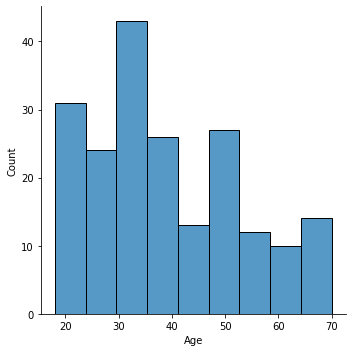

In [3]:
# Visualizations - Univariate Analysis

sns.displot(df["Age"])

<AxesSubplot:xlabel='CustomerID'>

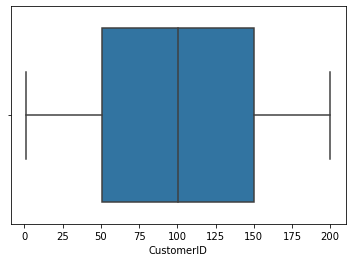

In [4]:
sns.boxplot(df["CustomerID"])

<AxesSubplot:xlabel='CustomerID', ylabel='Age'>

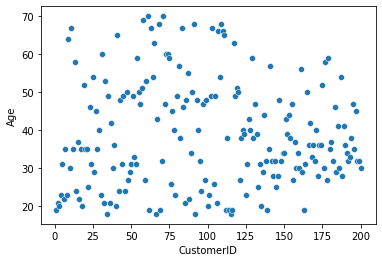

In [5]:
# Visualizations Bi-Variate Analysis

sns.scatterplot(x=df.CustomerID,y=df.Age)

<AxesSubplot:xlabel='CustomerID', ylabel='Age'>

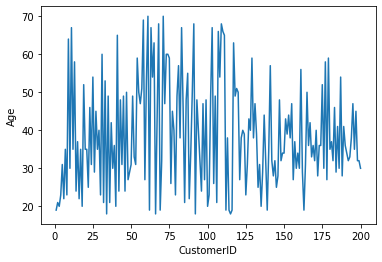

In [6]:
sns.lineplot(x=df.CustomerID,y=df.Age)

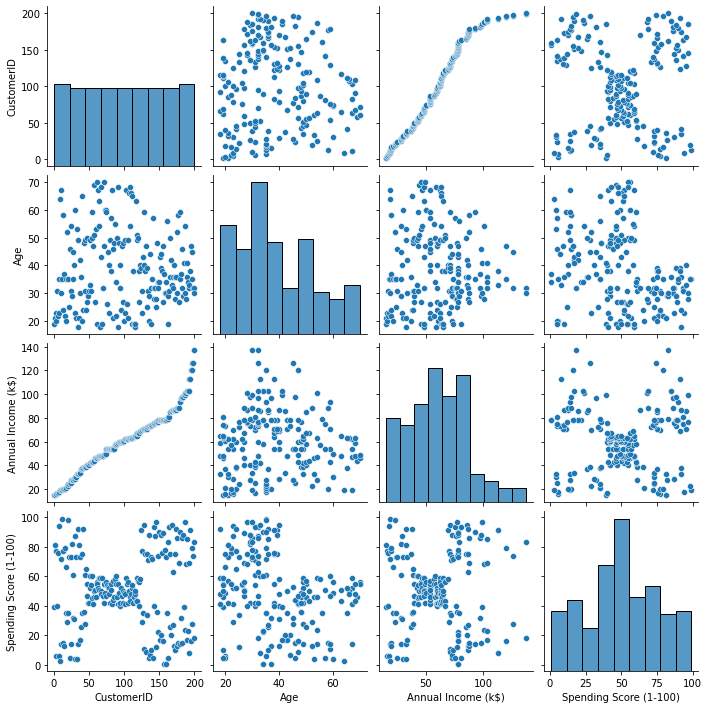

In [7]:
# Visualizations Multi-Variate Analysis

sns.pairplot(df)

In [8]:
# descriptive statistics

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
#  Missing values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#outliers

qnt = df.quantile(q=(0.25,0.75))
qnt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [11]:
iqr = qnt.loc[0.75]-qnt.loc[0.25]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [12]:
lower = qnt.loc[0.25]-1.5*iqr
lower

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [13]:
upper=qnt.loc[0.75]+1.5*iqr
upper

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

<AxesSubplot:xlabel='Annual Income (k$)'>

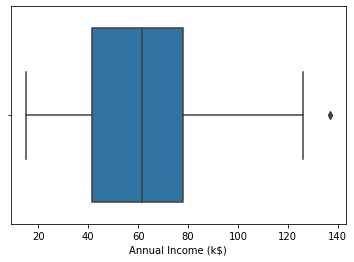

In [14]:
sns.boxplot(df["Annual Income (k$)"])

In [15]:
df["Annual Income (k$)"]=np.where(df["Annual Income (k$)"]>125,120,df["Annual Income (k$)"])

<AxesSubplot:xlabel='Annual Income (k$)'>

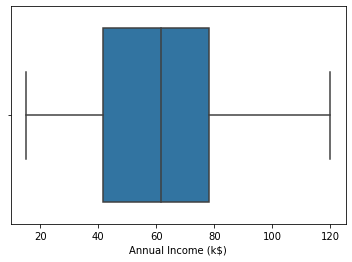

In [16]:
sns.boxplot(df["Annual Income (k$)"])

In [17]:
# Categorical columns and  encoding

numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns
categorical_features

Index(['Gender'], dtype='object')

In [18]:
df = pd.get_dummies(df)
dummy_df = df
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,120,28,1,0
197,198,32,120,74,0,1
198,199,32,120,18,0,1


In [19]:
# Scale the data

names=df.columns
names

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [20]:
from sklearn.preprocessing import scale
X=scale(df)
X

array([[-1.7234121 , -1.42456879, -1.77018851, -0.43480148, -1.12815215,
         1.12815215],
       [-1.70609137, -1.28103541, -1.77018851,  1.19570407, -1.12815215,
         1.12815215],
       [-1.68877065, -1.3528021 , -1.73113736, -1.71591298,  0.88640526,
        -0.88640526],
       ...,
       [ 1.68877065, -0.49160182,  2.33018196,  0.92395314, -1.12815215,
         1.12815215],
       [ 1.70609137, -0.49160182,  2.33018196, -1.25005425, -1.12815215,
         1.12815215],
       [ 1.7234121 , -0.6351352 ,  2.33018196,  1.27334719, -1.12815215,
         1.12815215]])

In [21]:
x1 = pd.DataFrame(X,columns = names )
x1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.723412,-1.424569,-1.770189,-0.434801,-1.128152,1.128152
1,-1.706091,-1.281035,-1.770189,1.195704,-1.128152,1.128152
2,-1.688771,-1.352802,-1.731137,-1.715913,0.886405,-0.886405
3,-1.671450,-1.137502,-1.731137,1.040418,0.886405,-0.886405
4,-1.654129,-0.563369,-1.692086,-0.395980,0.886405,-0.886405
...,...,...,...,...,...,...
195,1.654129,-0.276302,2.330182,1.118061,0.886405,-0.886405
196,1.671450,0.441365,2.330182,-0.861839,0.886405,-0.886405
197,1.688771,-0.491602,2.330182,0.923953,-1.128152,1.128152
198,1.706091,-0.491602,2.330182,-1.250054,-1.128152,1.128152


In [22]:
# clustering 
from sklearn.cluster import KMeans

In [23]:
df1=df[["CustomerID","Gender_Female","Gender_Male","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [24]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

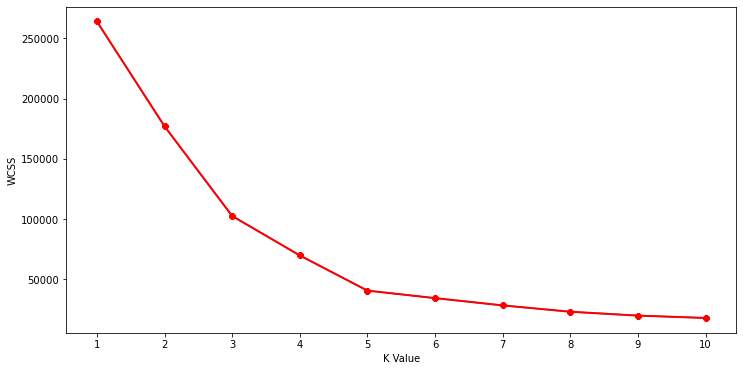

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [26]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender_Female,Gender_Male,Age,Annual Income (k$),Spending Score (1-100),label
0,1,0,1,19,15,39,3
1,2,0,1,21,15,81,4
2,3,1,0,20,16,6,3
3,4,1,0,23,16,77,4
4,5,1,0,31,17,40,3


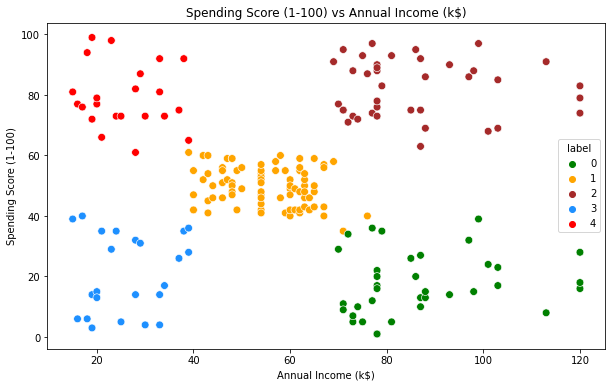

In [27]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [28]:
#  Split the data into dependent and independent variables

x = df.drop(columns=["Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

In [29]:
x

,CustomerID,Age,Annual Income (k$),Gender_Female,Gender_Male
0,1,19,15,0,1
1,2,21,15,0,1
2,3,20,16,1,0
3,4,23,16,1,0
4,5,31,17,1,0
...,...,...,...,...,...
195,196,35,120,1,0
196,197,45,120,1,0
197,198,32,120,0,1
198,199,32,120,0,1


In [30]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [31]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
# Build the Model
# Train the Model
# Test the Model

from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
pred = model.predict(x_test)

In [36]:
# Measure the performance using Metrics

from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [37]:
print("accuracy_score:",accuracy_score(y_test,pred))
print("precision_score:",precision_score(y_test,pred,average = "macro"))
print("confusion_matrix:\n",confusion_matrix(y_test,pred))

accuracy_score: 0.025
precision_score: 0.006289308176100628
confusion_matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
